# References
https://huggingface.co/blog/fine-tune-vit

Platzi couse: Transfer Learning with Hugging Face

Transformers are also used in image classification tasks, although they were initially developed primarily for natural language processing.
There is a variant of the Transformers called "Vision Transformers" (ViT) that have been used successfully in image classification.
We decided to test Vision Transformers (which uses transfer learning) on this notebook, because we saw how powerful they are for classification.

# Labeling

In [1]:
# PATHS
# path to the folder containing the subfolders with the training images
trainpath = '/content/drive/MyDrive/Proyectos/img-classs/seg_train/seg_train'
# path to the folder containing the subfolders with the testing images
testpath = '/content/drive/MyDrive/Proyectos/img-classs/seg_test/seg_test'


In [2]:
# Create a dictionary to change text labels into int numerical labels
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_labels = {class_name:i for i, class_name in enumerate(class_names)}

print(class_labels)

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


In [3]:
# def for labeling 

import os
from PIL import Image
IMAGE_SIZE = (150, 150)

def labeling(folder_path, images, labels):
    # loop through all subfolders in the folder_path
    for label in os.listdir(folder_path):
        # get the path to the subfolder
        label_path = os.path.join(folder_path, label)

        # convert label text to label number
        label_number = class_labels[label]

        # loop through all images in subfolder
        for file_name in os.listdir(label_path):
            # upload image using Pillow
            image = Image.open(os.path.join(label_path, file_name))

            # resize image to desired size
            image = image.resize(IMAGE_SIZE)

            # add image to image list
            images.append(image)

            # add image labellabel list
            labels.append(label_number)
    
    return images, labels


In [4]:
# Training labeling
# list to store the images and their labels
training_images = []
training_labels = []
x_train, y_train = labeling(trainpath, training_images, training_labels)

# Testing labeling
# list to store the images and their labels
testing_images = []
testing_labels = []
x_test, y_test = labeling(testpath, testing_images, testing_labels)

When working with ViT it is not necessary to convert the images to arrays at this point.

In [5]:
type(x_train[0])

PIL.Image.Image

In [6]:
type(y_train)

list

In [7]:
!pip install datasets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 19.9 MB/s eta 0:00:00


In [8]:
from datasets import Dataset, DatasetDict

# Create a dictionary with the lists
dataset_test = DatasetDict({
    'test': Dataset.from_dict({'image': x_test, 'label': y_test})
})

# Check the structure of the created dictionary
print(dataset_test)

DatasetDict({
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 3000
    })
})


In [9]:
# Create a dictionary with the lists
dataset_train = DatasetDict({
    'train': Dataset.from_dict({'image': x_train, 'label': y_train})
})

# Check the structure of the created dictionary
print(dataset_train)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 14034
    })
})


In [10]:
# Join previos dictionaries to have a dataset
ds = DatasetDict({
    'train': dataset_train['train'],
    'test': dataset_test['test']
})
print(ds)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 14034
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 3000
    })
})


### Let's see if the previous implementation is working

In [11]:
ex = ds['train'][400]
ex

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=150x150 at 0x7FA4B6D10850>,
 'label': 0}

In [12]:
lab_ex = ds['train']['label'][400]
lab_ex


0

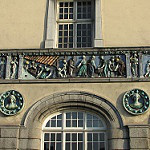

In [13]:
image = ex["image"]
image

In [14]:
train_labels = ds['train']['label']
unique_labels = list(set(train_labels))

# Print the list of unique values of the training set labels
print(unique_labels)


[0, 1, 2, 3, 4, 5]


There are depreciation problems in certain transformer modules, so it was decided to work with this older version to avoid them.

In [15]:
pip install transformers==4.28.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.6 MB/s eta 0:00:00


This part of the code imports the ViTFeatureExtractor class. It then loads a pre-trained Vision Transformer model using the identifier "google/vit-base-patch16-224-in21k". This provides a basis for processing and extracting image features using the pretrained model.

In [16]:
from transformers import ViTFeatureExtractor
repo_id = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(repo_id)

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Configuración del extractor

In [17]:
print(feature_extractor)

ViTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}



feature_extractor(image, return_tensors="pt") uses the feature_extractor to process the input image and get the representation of features in the form of PyTorch tensors. This is necessary to prepare the image for input to the Vision Transformer model and to perform tasks such as image classification.

In [18]:
feature_extractor(image, return_tensors="pt")

{'pixel_values': tensor([[[[ 0.6314,  0.6392,  0.6392,  ...,  0.6471,  0.6471,  0.6471],
          [ 0.6078,  0.6235,  0.6314,  ...,  0.6471,  0.6471,  0.6471],
          [ 0.5922,  0.6078,  0.6235,  ...,  0.6471,  0.6471,  0.6471],
          ...,
          [-0.3490, -0.3412, -0.3412,  ..., -0.2784, -0.0510,  0.1451],
          [-0.2235, -0.2235, -0.2314,  ..., -0.0980, -0.0745, -0.0824],
          [-0.0353, -0.0431, -0.0588,  ...,  0.1373, -0.0431, -0.2627]],

         [[ 0.4980,  0.5059,  0.5059,  ...,  0.4980,  0.4980,  0.4980],
          [ 0.4745,  0.4902,  0.4980,  ...,  0.4980,  0.4980,  0.4980],
          [ 0.4588,  0.4745,  0.4902,  ...,  0.4980,  0.4980,  0.4980],
          ...,
          [-0.4039, -0.3961, -0.3961,  ..., -0.3569, -0.1294,  0.0667],
          [-0.2784, -0.2784, -0.2863,  ..., -0.1765, -0.1529, -0.1529],
          [-0.0902, -0.0980, -0.1137,  ...,  0.0588, -0.1216, -0.3333]],

         [[ 0.1608,  0.1686,  0.1686,  ...,  0.1686,  0.1686,  0.1686],
          [ 0

It returns a dictionary with a single key

In [19]:
feature_extractor(image, return_tensors="pt").keys()

dict_keys(['pixel_values'])

pixel tensor shape

In [20]:
feature_extractor(image, return_tensors="pt")["pixel_values"].shape

torch.Size([1, 3, 224, 224])

In [21]:
def transform(sample_batch):
    # take list of PIL images & turn them into pixel values
    inputs = feature_extractor([x for x in sample_batch['image']], return_tensors="pt")
    
    # prepare labels
    inputs['label'] = sample_batch['label']
    return inputs

In [22]:
prepared_ds = ds.with_transform(transform)

# Data collector

A data collector in the context of Vision Transformers is responsible for collecting and organizing the data needed to train or evaluate a ViT model. Performs tasks such as loading and processing the images, dividing the data into sets, assigning labels to the images, and performing the proper coding of the images for input to the model.

The collate_fn function is used to define how data is processed and structured in a batch within a DataLoader in PyTorch. In the specific case of this code, it takes a batch of samples represented as dictionaries, stacks the pixel and label values into tensors, and returns a dictionary with the keys "pixel_values" and "labels".

In [23]:
import torch

def collate_fn(batch):
  return {
      "pixel_values": torch.stack([x["pixel_values"] for x in batch]),
      "labels": torch.tensor([x["label"] for x in batch])
  }

### Metrics

We use accuracy because it can be easily used to compare the predictions with the original labels.

In [24]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(prediction):
  return metric.compute(predictions=np.argmax(prediction.predictions, axis=1), references=prediction.label_ids)


<ipython-input-24-18a1ea23510f>:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


# Trainer configuration

This part of the code loads and configures a pre-trained Vision Transformer model for image classification using the ViTForImageClassification class from the 🤗 Transformers library. Also, it sets the number of tags/classes, as well as the mappings between the indexes and the tags.

In [25]:
from transformers import ViTForImageClassification


model = ViTForImageClassification.from_pretrained(
    repo_id,
    num_labels=len(unique_labels),
    id2label={str(i): c for i, c in enumerate(unique_labels)},
    label2id={c: str(i) for i,c in enumerate(unique_labels)}
)


Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


 TrainingArguments is used to configure the arguments related to training the model, such as the location of the results, the evaluation strategy, the training epochs, the learning rate, etc.

In [26]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/Proyectos/img-classs",
    evaluation_strategy="steps",
    num_train_epochs=4,
    learning_rate=2e-4,
    remove_unused_columns=False,
    load_best_model_at_end=True,
)

Trainer is a class provided by the 🤗 Transformers library that is used to set up and run training on a model. You are provided with the model, the training arguments, the training and evaluation data sets, as well as additional functions such as the data_collator and compute_metrics for data processing and metric calculation. The Trainer is in charge of carrying out the model training process using the specified parameters and configurations.

In [27]:
from transformers import Trainer


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=prepared_ds["train"],
    eval_dataset=prepared_ds["test"],
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    tokenizer=feature_extractor
)

In [ ]:
train_results = trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy
500,0.436800,0.560629,0.830667
1000,0.339600,0.342098,0.888333
1500,0.297800,0.259437,0.915333
2000,0.238800,0.293997,0.912000
2500,0.212100,0.228049,0.927333


In [ ]:
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)

# Evaluation

We use seg_test as validation data so, to evaluate de the performance of this model we are going to use data of the seg_pred which is not labeled. 

In [ ]:
metrics = trainer.evaluate(prepared_ds[""])

# Conclusion
Vision Transformers break this image down into smaller parts, such as small blocks or patches. Each patch is a portion of the image that contains information about a specific part, such as an ear or paw of the dog.

Each patch is then presented to the Vision Transformer for processing. The Vision Transformer takes each patch and transforms it into a vector (a list of numbers). This vector captures important features of the patch, such as color, shape, and texture.

After processing all the patches in the image, the resulting vectors are combined and sent through various layers within the Vision Transformer. These layers are called "attention" and are responsible for analyzing and learning the relationships between the different patches and the features they represent.

The Vision Transformer uses the attention information to understand how the patches are related to each other and how they contribute to the image as a whole. For example, you can learn that one set of patches is part of the dog's body and another set of patches is the background.

Finally, the Vision Transformer takes this understanding of the image and performs a classification or a specific task, such as identifying whether or not the image contains a dog.

An important difference between Vision Transformers and Convolutional Neural Networks (CNNs) is that Vision Transformers do not use convolutional layers. Instead, they rely on the idea of attention to learn the relationships between the patches in the image.

FInally, Vision Transformers decompose an image into patches, transform them into vectors, learn the relationships between the patches using attention layers, and use this information to understand the image and perform tasks such as classification.